# Group Assignment for Week5

In [47]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.linalg
import random
from scipy.optimize import fsolve

### Problem 1

$x_{n + 1} = g(x_n)$  
$g(x) = {{1}\over{2}}(x + {{a^2}\over{x}})$  
$x_{n+1} = {{1}\over{2}}(x_n+{{a^2}\over{x_n}})\geq{a}$  
<font size = 3 color = black face = "Times New Roman">so no matter what ${x_1}$ we choose, $x_2, x_3$... must be larger than $a$  
$g^{'}(x) = {{1}\over{2}}(1 - {{a^2}\over{x^2}})$   
<font size = 3 color = black face = "Times New Roman">so if $x_n>a$, we can deduce that $g^{'}(x_n)<{{1}\over{2}}$ and $a<x_{n+1}<x_n$  
${x_{n+1}-x^*}\over{x_n-x^*}$ $=$ ${g'({\xi_n})(x_n-x^*)}\over{x_n-x^*} $$= g'({\xi_n})$  
<font size = 3 color = black face = "Times New Roman">easy to get ${x_{n}-x^*} < ({{1}\over{2}})^{n-2}(x_2-x^*)$  
$\lim_\limits{n\to \infty}{x_{n}-x^*} = 0$  
$\lim_\limits{n\to \infty}x_n = x^* = a$  
until now, we have proved that $x_n$ must converge to $a$

<font size = 3 color = black face = "Times New Roman">now let's prove the convergence is quadratic  
${g'({x^*}) = g'(a) = {{1}\over{2}}(a - a) = 0 } $  
$g''(x) = {{a^2}\over{x^3}}$ and $g''(x^*) = {{1}\over{a}} \neq 0$  
so the convergence is quadratic

### <font size = 3 color = black face = "Times New Roman">Problem 2

#### Question a

In [92]:
def y(e):
    return np.sqrt(10 + e) * np.tan(np.sqrt(10 + e)) - np.sqrt(-e) #define the even function

<font size = 3 color = black face = "Times New Roman">First I want to draw the picture of y(e), it can help us fund the region where the root located.

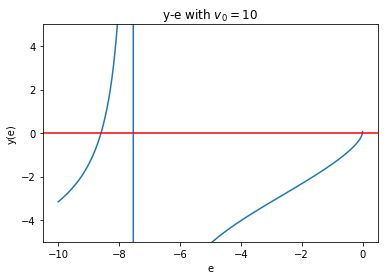

In [93]:
e = np.linspace(-10,0,10000)
y = y(e)
plt.plot(e, y, label = 'zero of even function')
plt.xlabel('e')
plt.ylabel('y(e)')
plt.title('y-e with $v_0 = 10$')
plt.axhline(y=0,color='red')
plt.ylim(-5, 5)
plt.show()

<font size = 3 color = black face = "Times New Roman">Easily to find that the roots are in the region (-10.0, -8.0),(-8.0,-7.1),(-2.0,-0.001).But, there is a problem to calculate the root in reginon (-8.0, -7.1), actually, it is not exist. Because the function goes to infinity here, which is very difficult to calculate. Then we will use the secant method to get them.

In [50]:
# Its a function that use sacnt method to get the root of a given function.
def secant(f, x2, x1, eps):
    f_x2 = f(x2)
    f_x1 = f(x1)
    iteration_counter = 0
    while abs(f_x2) > eps and iteration_counter < 100:
        try:
            denominator = (f_x1 - f_x2)/(x1 - x2)
            x = x1 - f_x1/denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x2)
            sys.exit(1)
        x2 = x1
        x1 = x
        f_x2 = f(x2)
        f_x1 = f(x1)
        iteration_counter = iteration_counter + 1
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x

In [51]:
e_root = [0,0]
e_root[0] = secant(f_e, -10, -10+10/8, 10**(-10))
e_root[1] = secant(f_e, -2.0, -0.001, 10**(-10))
print(e_root)

[-8.592785275229838, -0.004019262453329338]


<font size = 3 color = black face = "Times New Roman">Here, we get two roots for the even function.

#### Question b

In [52]:
# define a new function to make our code more concise
def f(v,e):
    return np.sqrt(v + e) * np.tan(np.sqrt(v + e)) - np.sqrt(-e)

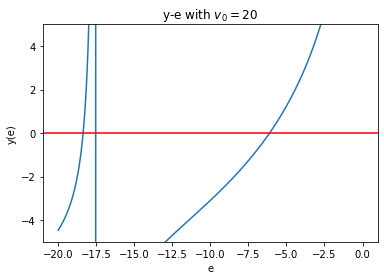

In [53]:
e = np.linspace(-20,0,10000)
y = f(20,e)
plt.plot(e, y, label = 'zero of even function')
plt.xlabel('e')
plt.ylabel('y(e)')
plt.title('y-e with $v_0 = 20$')
plt.axhline(y=0,color='red')
plt.ylim(-5, 5)
plt.show()

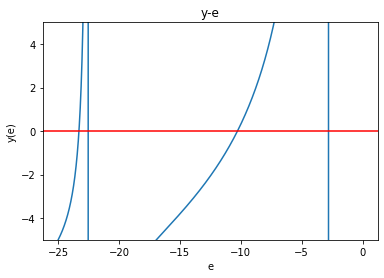

In [54]:
e = np.linspace(-25,0,10000)
y = f(25,e)
plt.plot(e, y, label = 'zero of even function')
plt.xlabel('e')
plt.ylabel('y(e)')
plt.title('y-e')
plt.axhline(y=0,color='red')
plt.ylim(-5, 5)
plt.show()

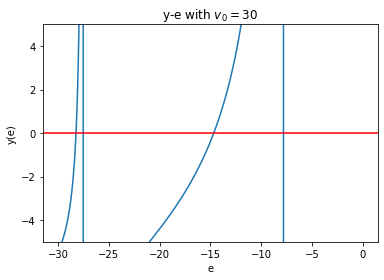

In [55]:
e = np.linspace(-30,0,10000)
y = f(30,e)
plt.plot(e, y, label = 'zero of even function')
plt.xlabel('e')
plt.ylabel('y(e)')
plt.title('y-e with $v_0 = 30$')
plt.axhline(y=0,color='red')
plt.ylim(-5, 5)
plt.show()

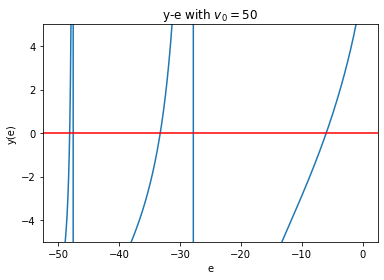

In [56]:
e = np.linspace(-50,0,10000)
y = f(50,e)
plt.plot(e, y, label = 'zero of even function')
plt.xlabel('e')
plt.ylabel('y(e)')
plt.title('y-e with $v_0 = 50$ ')
plt.axhline(y=0,color='red')
plt.ylim(-5, 5)
plt.show()

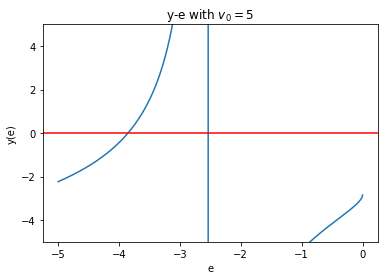

In [57]:
e = np.linspace(-30,0,10000)
y = f(5,e)
plt.plot(e, y, label = 'zero of even function')
plt.xlabel('e')
plt.ylabel('y(e)')
plt.title('y-e with $v_0 = 5$')
plt.axhline(y=0,color='red')
plt.ylim(-5, 5)
plt.show()

<font size = 3 color = black face = "Times New Roman">It is not difficult to see from the above graphs that as the depth of the potential well gets deeper, the number of bound states will increase, and as the depth of the potential well gets shallower, the number of bound states will decrease.

In [58]:
# We define a function to get the ground state energy.
def energy(v,eps):
    def f(e):
        return np.sqrt(v + e) * np.tan(np.sqrt(v + e)) - np.sqrt(-e)
    x2 = -v
    f_x2 = f(x2)
    x1 = x2 + 0.001
    f_x1 = f(x1)
    # Find the values at both ends of the ground state
    while f_x2 * f_x1 > 0:
        x1 += 0.001
        f_x1 =f(x1)  
    iteration_counter = 0
    while abs(f_x2) > eps and iteration_counter < 100:
        try:
            denominator = (f_x1 - f_x2)/(x1 - x2)
            x = x1 - f_x1/denominator
        except ZeroDivisionError:
            print('Error! - denominator zero for x = ', x2)
            sys.exit(1)
        x2 = x1
        x1 = x
        f_x2 = f(x2)
        f_x1 = f(x1)
        iteration_counter = iteration_counter + 1
    if abs(f_x1) > eps:
        iteration_counter = -1
    return x

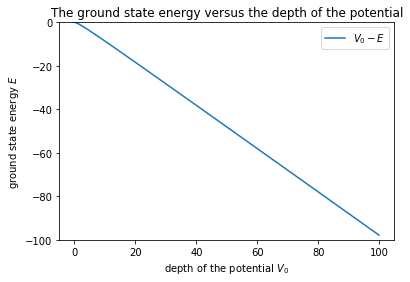

In [59]:
v = np.arange(0.1,100,0.1)
e = np.arange(0.1,100,0.1) # Give e an initial value to prevent errors
l = v.size
for i in range(0,l):
    e[i] = energy(v[i],10**(-10))
plt.plot(v, e)
plt.ylabel('ground state energy $E$')
plt.xlabel('depth of the potential $V_0$')
plt.title('The ground state energy versus the depth of the potential')
plt.legend(['$V_0 - E$'])
plt.ylim(-100, 0)
plt.show()

<font size = 3 color = black face = "Times New Roman">We make the diagram of the ground state energy versus the depth of the potential.It can be seen from the figure that the ground state energy is negatively correlated with the depth of the potential well. The deeper the potential well is, the smaller the ground state energy is.

### Problem 3

<font size = 3 color = black face = "Times New Roman">Our problem is to find the bond length of the diatomic molecule NaCl (sodium chloride) from the interaction potential between the two ions.  The bond length $r_{\text{eq}}$ is the equilibrium distance when $V\left(  r\right)$ is at its minimum. 
    
<font size = 3 color = black face = "Times New Roman">We have the potential model $V(r)=-\dfrac{e^2}{r}+V_0e^{-r/r_0}$ and related parameters $e^2=14.4$ $\text{Å}\cdot eV$, $V_0=1.09\times 10^3 \text{ eV}$, $r_0=0.330\text{ Å}$. 

In [60]:
# Enter related parameters.
e_e = 14.4 # Å.eV
V_0 = 1.09 * 10 ** 3 # eV
r_0 = 0.330 # Å

<font size = 3 color = black face = "Times New Roman"> To get the minimum of $V(r)$, it's actual solving the equation $V'(r) = 0$. Here we choose Newton's method to solve this equation, and therefore, we requires the first and second order derivative for $V(r)$. Let $f(r) = V'(r)$, then $f'(r) = V''(r)$. Firstly, let's get $f(r)$ and $f'(r)$ by direct mathematical calculation.
$$
f(r) = V'(r) = \dfrac{e^2}{r^2}-\dfrac{V_0}{r_0}e^{-r/r_0}
$$
As a result,
$$
f(r) = V'(r) = -\dfrac{2e^2}{r^3}+ \dfrac{V_0}{{r_0}^2}e^{-r/r_0}
$$

In [61]:
# Entering the original function and its first and second order derivative.
import numpy as np
def V(r): # Original function
    return - e_e / r + V_0 * np.exp(- r / r_0)

def f(r): # First order derivative
    return e_e / r**2 - (V_0 * np.exp(- r / r_0)) / r_0

def dfdr(r): # Second order derivative
    return -2 * e_e / r**3 + (V_0 * np.exp(- r / r_0)) / (r_0 ** 2)

<font size = 3 color = black face = "Times New Roman"> Since we assume when $V(r)$ is at its minimum, $r = r_{eq}$, so $f(r_{eq}) = 0$. Then,  let's plot the plot  $f(r)$ as a function of $r$ to have a general idea where $r_{\text{eq}}$, the zero point for $f(r)$, locates.

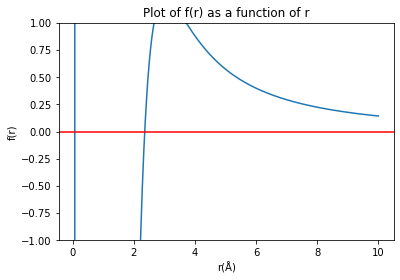

In [62]:
r = np.linspace(0.05, 10, 1000)
plt.plot(r, f(r))
plt.title('Plot of f(r) as a function of r')
plt.xlabel('r(Å)')
plt.ylabel('f(r)')
plt.ylim([-1,1]) # Limit the range of y to have a better look at the zero points.
plt.axhline(y=0, color = 'red')
plt.show()

<font size = 3 color = black face = "Times New Roman">There seems to exist more than zero points. Since for the first zero point $f(r)>0$ before it goes to zero, it actually indicates a maximum point. On the other hand, for the second one $f(r)<0$ before it goes to zero, so it corresponds to the minimum point. Clearly, the second one is what we actually want. As a result we limit the section chosen to $[2,4]$ and do another plotting.

<font size = 3 color = black face = "Times New Roman">From the plotting above we can find $r_{eq}$ is in the section $[2,2.5]$.
    
<font size = 3 color = black face = "Times New Roman"> **Here we use the stragety given in the lecture note: Newton Raphson Algorithm**

In [ ]:
def minimum_finder(g, f, dfdx, x, eps): 
    g_value = g(x) 
    f_value = f(x)
    temp_g = g(x) + 1 
    iteration_counter = 0
    temp_x = x - 1 # Set an initial value for temp_x.

    while abs(x - temp_x) > eps and iteration_counter < 100:
        try:
            temp_x = x # Store the previous value for x.
            delta_x = - f_value/dfdx(x)
            if g(x + delta_x) > g(x): # Test whether the operation makes g(x) larger.
                delta_x = -delta_x # Inverse the sign for delta_X if it makes x farther from the solution.
            x = x + delta_x
        except ZeroDivisionError: # Dealing with the zerodivision error.
            print('Error! - derivative zero for x = {:g}'.format(x))
            sys.exit(1) 
        f_value = f(x)
        iteration_counter += 1
        
    if abs(x - temp_x) > eps: # Not convergent.
        iteration_counter = -1  
    return x, iteration_counter

In [65]:
eps = 10 ** (-10) # Set the tolerance epsilon. 
print(minimum_finder(V, f, dfdr, x = 0.2, eps = 10 **(-10)))  
print(minimum_finder(V, f, dfdr, x = 0.5, eps = 10 **(-10)))  
print(minimum_finder(V, f, dfdr, x = 2, eps = 10 **(-10)))
print(minimum_finder(V, f, dfdr, x = 2.5, eps = 10 **(-10))) 
print(minimum_finder(V, f, dfdr, x = 15, eps = 10 **(-10)))  

(2.3605384841577854, 11)
(2.3605384841577943, 11)
(2.3605384841577943, 7)
(2.3605384841577943, 6)
(2.3605384841577943, 11)


<font size = 3 color = black face = "Times New Roman">Now,we get the result we want: $r_{eq} \approx 2.3605384841577943Å$. However, we can find that the solution can be affected by the initial points chosen. Therefore, though this program can find the solution even though x is not very close to the point, we should still be careful when choosing the initial point, for instance, x = 0.1 may fail to get the correct answer.

<font size = 3 color = black face = "Times New Roman">Finally, let's compare the result with the results from Python package `scipy.optimize`

In [66]:
from scipy import optimize
for r in [0.5, 2, 2.3, 2.5, 15]:
    sol_scipy = optimize.minimize(V, r)
    print('{}\n'.format(sol_scipy))

fun: -5.247489118539933
 hess_inv: array([[0.17640446]])
      jac: array([-2.32458115e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 11
     njev: 12
   status: 0
  success: True
        x: array([2.36053806])

      fun: -5.24748911853978
 hess_inv: array([[0.17610372]])
      jac: array([2.74181366e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 12
   status: 0
  success: True
        x: array([2.36053897])

      fun: -5.247489118540433
 hess_inv: array([[0.1773858]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([2.36053848])

      fun: -5.247489118537127
 hess_inv: array([[0.17581081]])
      jac: array([6.19888306e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([2.36053957])

      fun: -5.24

<font size = 3 color = black face = "Times New Roman"> We can see the results is in line with our solutions for the first several significant numbers. But this solution can is not stable if I choose different initial guess.The initial guess closest to the final results gives rise to the result almost the same with our result, but still not so accurate. **In a word, our result is correst, and  $r_{eq} \approx 2.3605384841577943Å$.**

### Problem 4

####  Question a

<font size = 3 color = black face = "Times New Roman">Since the nonlinear system is  
$$
\begin{cases}
2e^x+y=0\\
3x^2+4y^2=8
\end{cases}
$$
We do two plottings and check their crossing point to locate the root graphically. Firstly, we need to convert two equations into two functions. For the first equation:$$y_1 = -2e^x$$
From the first equation we can find that the crossing points can only occur for when $y<0$ since $y_1$ is always smaller than 0. Therefor, for the second equation, when $y<0$
$$
y_2 = -\dfrac{\sqrt{8 - 3x^2}}{2}
$$
From $y_2$ we can find x is constrained in $[-\dfrac{2\sqrt{6}}{3}, \dfrac{2\sqrt{6}}{3}]$

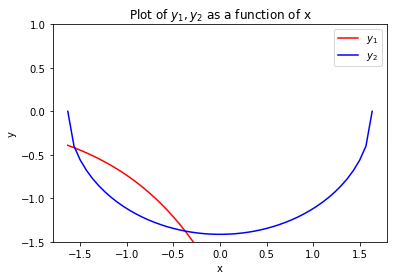

In [67]:
x = np.linspace(- 2*np.sqrt(6)/3, 2*np.sqrt(6)/3)
y1 = -2*np.exp(x)
y2 = - (8-3*x**2)**(1/2)/2
plt.plot(x, y1, color = 'r')
plt.plot(x, y2, color = 'b')
plt.title(r'Plot of $y_1,y_2$ as a function of x')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-1.5, 1])
plt.legend([r'$y_1$',r'$y_2$'])
plt.show()

<font size = 3 color = black face = "Times New Roman"> From the figure, we can find that the crossing points are between $[-2, -1.5]$ and $[-0.5, 0]$ respectively. 

####  Question b

<font size = 3 color = black face = "Times New Roman"> To solve this set of nonlinear equations, we still use Newton's method. First, we need to determine the original matrix F and its corresponding Jacobi matrix J. Since the matrix is not so difficult, we calculate it directly.

<font size = 3 color = black face = "Times New Roman"> The original matrix
    $$F = \left( \begin{matrix} f_1 \\ f_2 \end{matrix} \right) = \left( \begin{matrix} 2e^x+y \\ 3x^2+4y^2-8 \end{matrix} \right) $$
The Jacobian matrix
     $$J = \left( \begin{matrix} \dfrac{\partial f_1}{\partial x} & \dfrac{\partial f_1}{\partial y} \\ \dfrac{\partial f_2}{\partial x} & \dfrac{\partial f_2}{\partial y} \end{matrix} \right) = \left( \begin{matrix} 2e^x & 1 \\ 6x & 8y \end{matrix} \right)$$

In [68]:
# Entering F and J
def F(x):
    return np.array(
        [2*np.exp(x[0]) + x[1],
         3*x[0]**2 + 4*x[1]**2 - 8])
def J(x):
    return np.array(
        [[2*np.exp(x[0]), 1],
        [6*x[0], 8*x[1]]])

In [69]:
def Newton_system(F, J, x, eps):
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=2) # l2 norm of vector
    iteration_counter = 0
    
    while abs(F_norm) > eps and iteration_counter < 100: # Use the norm to judge to accuracy.
        delta_x = np.linalg.solve(J(x), -F_value) #Solve delta_x from F_value + J(x)*delta_x = 0
        x = x + delta_x
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter = iteration_counter + 1
        
    if abs(F_norm) > eps: # Not convergent.
        iteration_counter = -1
    return x, iteration_counter

In [70]:
# Try multiple initial values and set the accuracy 10e-8
print(Newton_system(F, J, x=np.array([-3, -0.5]), eps=10**(-8))) 
print(Newton_system(F, J, x=np.array([-1.5, -0.5]), eps=10**(-8)))
print(Newton_system(F, J, x=np.array([-0.5, -1.2]), eps=10**(-8)))
print(Newton_system(F, J, x=np.array([-0, -1.5]), eps=10**(-8)))

(array([-1.55907909, -0.42065935]), 5)
(array([-1.55907909, -0.42065935]), 3)
(array([-0.37342874, -1.37674007]), 4)
(array([-0.37342874, -1.37674007]), 4)


<font size = 3 color = black face = "Times New Roman"> Finally, we get the two sets of solutions:
$$
\begin{cases}
x_1 = -1.55907909\\
y_1 =-0.42065935
\end{cases}
\begin{cases}
x_2 = -0.37342874\\
y_2 =-1.376740075
\end{cases}
$$

In [71]:
print(fsolve(F, [-1.5, -0.5] ))
print(fsolve(F, [-0.5, -1.2] ))

[-1.55907909 -0.42065935]
[-0.37342874 -1.37674007]


<font size = 3 color = black face = "Times New Roman">We can find that these results are in line with our results. It proves that our results are accurate.

### Problem 5

5. Consider a linear $2\times 2$ system (with unknowns $x_1$ and $x_2$) described by its augmented matrix 
    $$
    \begin{bmatrix}
    \left.\begin{matrix}\varepsilon & 1\\
    1 & 1
    \end{matrix}\right\vert
    \begin{matrix}
    2\\
    1
    \end{matrix}\end{bmatrix}
    $$
    where $\epsilon > 0$ is a very small constant.

    a) Solve by Gauss elimination without partial pivoting.

    b) Solve by Gauss elimination with partial pivoting. Compare the results and discuss their validity.

#### Question a

Here we have 
$$
\epsilon x_1 + x_2 = 2\\
x_1 + x_2 = 1
$$
Then we can get
$$
(1 - \frac{1}{\epsilon})x_2 = 1 - \frac{2}{\epsilon}\\
x_2 = 1 + \frac{1}{1 - \epsilon}\\
x_1 = \frac{2 - x_2}{\epsilon}
$$
Then we will use code to test the answer.

In [72]:
# define the test values (for epsilon)
test_values = np.ones((10,))
for i in range(10):
    test_values[i] = 1. * 10 ** (-i - 1)

In [73]:
x1 = np.ones((10,))
x2 = np.ones((10,))
print('x1\t\t\tx2')
for i in range(10):
    x2[i] = 1 + 1 / (1 - test_values[i])
    x1[i] = (2 - x2[i]) / test_values[i]
    print(f'{x1[i]:<20}\t{x2[i]:<20}')

x1			x2
-1.1111111111111116 	2.111111111111111   
-1.0101010101010388 	2.0101010101010104  
-1.0010010010010895 	2.001001001001001   
-1.0001000099979507 	2.000100010001      
-1.0000100000961964 	2.000010000100001   
-1.0000010002286785 	2.0000010000010002  
-1.0000001005039394 	2.00000010000001    
-0.999999993922529  	2.00000001          
-1.000000082740371  	2.000000001         
-1.000000082740371  	2.0000000001        


#### Question b

<font size = 4 color = black face = "Times New Roman">Here we have 
$$
x_1 + x_2 = 1\\

\epsilon x_1 + x_2 = 2\\
$$
Then we can get
$$
(1 - \epsilon)x_2 = 2 - \epsilon\\
x_2 = 1 + \frac{1}{1 - \epsilon}\\
x_1 = 1 - x_2
$$
<font size = 4 color = black face = "Times New Roman">Then we will use code to test the answer.

In [74]:
print('x1\t\t\tx2')
for i in range(10):
    x2[i] = 1 + 1 / (1 - test_values[i])
    x1[i] = 1 - x2[i]
    print(f'{x1[i]:<20}\t{x2[i]:<20}')

x1			x2
-1.1111111111111112 	2.111111111111111   
-1.0101010101010104 	2.0101010101010104  
-1.001001001001001  	2.001001001001001   
-1.0001000100009998 	2.000100010001      
-1.000010000100001  	2.000010000100001   
-1.0000010000010002 	2.0000010000010002  
-1.00000010000001   	2.00000010000001    
-1.00000001         	2.00000001          
-1.000000001        	2.000000001         
-1.0000000001       	2.0000000001        


<font size = 3 color = black face = "Times New Roman">Comparing the two methods, it is not difficult to see that the results of the second method are more accurate. In addition, the use of the second method can avoid the error caused by the very small value of epsilon. Because it doesn't have to divide into epsilon in the calculation.

### Problem 6

<font size = 3 color = black face = "Times New Roman">In this problem, we will use LU and Cholesky method to solve Ax = b, and we will use several inner functions provided by scipy and numpy to help us solve this problem. Before that, I will explain the function.

<font size = 3 color = black face = "Times New Roman">scipy.linalg.lu_factor() will give us two matrix lu and piv.  
lu contains $U$ in its upper triangle, and $L$ in its lower triangle. The unit diagonal elements of $L$ are not stored.  
piv: pivot indices representing the permutation matrix $P$: row $i$ of matrix was interchanged with row $piv[i]$.  
when we use scipy.linalg.lu_solve(), both lu and piv are used, and this function will return us the solution $x$.

<font size = 3 color = black face = "Times New Roman">np.linalg.cholesky() will return us a matrix $L$, so we just need to solve to function $Ly = b$ and $L^Tx = y$, here we use scipy.linalg.solve() twice to solve this two function. 

In [75]:
n = 3  # use n = 3 as an example, but in fact our program can solve other n values
A = np.ones((n,n))
for i in range(n):
    for j in range(n):
        if i == j:
            A[i][j] = i+1
# construct matrix A
b = np.zeros((n,1))
for i in range(n):
    for j in range(n):
        b[i] = b[i] + A[i][j] * (j + 1)
#construct b
A, b

(array([[1., 1., 1.],
        [1., 2., 1.],
        [1., 1., 3.]]), array([[ 6.],
        [ 8.],
        [12.]]))

In [76]:
lu, piv = scipy.linalg.lu_factor(A)
x = scipy.linalg.lu_solve((lu,piv), b)
x

array([[1.],
       [2.],
       [3.]])

In [77]:
L = np.linalg.cholesky(A)
y = scipy.linalg.solve(L, b)
x = scipy.linalg.solve(L.T, y)
x

array([[1.],
       [2.],
       [3.]])

### Problem 7

<font size = 3 color = black face = "Times New Roman">In this problem, $z = ax^2 + bxy + cy^2 + dx + ey + f$, we let $z = 0$, and we want to solve $a,b,c,d,e,f$. To make it easier to do, we choose $f = 1$, then using Multiple linear regression.

<font size = 3 color = black face = "Times New Roman">This method tells us
   <font size = 3 color = black face = "Times New Roman">In matrix notation, we have an overdetermined system of equations 
   $$
   \mathbf{y=X a}
   $$
   where
   $$
   \begin{pmatrix}
   y_{1}\\
   y_{2}\\
   \vdots\\
   \\
   \\
   y_{n}%
   \end{pmatrix}=\begin{pmatrix}
   1 & x_{11} & x_{12} & \cdots & x_{1p}\\
   1 & x_{21} & x_{22} & \cdots & x_{2p}\\
   \vdots & \vdots & \ddots &  & \vdots\\
   &  &  &  & \\
   1 &  &  &  & \\
   1 & x_{n1} & x_{n2} & \cdots & x_{np}%
   \end{pmatrix} \begin{pmatrix}
   a_{0}\\
   a_{1}\\
   \vdots\\
   \\
   a_{p}%
   \end{pmatrix}
   $$
<font size = 3 color = black face = "Times New Roman">However, in this problem $z = 0$, which means $y_1 = y_2= \dots = y_n = 0$. That is almost impossible to get a solution. So we need to make some changes.

<font size = 3 color = black face = "Times New Roman">We let $a_0 = f = 1, a_1 =e, \dots, a_5 = a$, then the matrix equations become
   $$
   \mathbf{y=X a}
   $$
   where
   $$
   -
   \begin{pmatrix}
   1\\
   1\\
   \vdots\\
   \\
   \\
   1%
   \end{pmatrix}=\begin{pmatrix}
   x_{11} & x_{12} & \cdots & x_{15}\\
   x_{21} & x_{22} & \cdots & x_{25}\\
   \vdots & \vdots & \ddots &  \vdots\\
   &  &  &   \\
   x_{n1} & x_{n2} & \cdots & x_{n5}%
   \end{pmatrix} \begin{pmatrix}
   e\\
   d\\
   \vdots\\
   \\
   a%
   \end{pmatrix}
   $$
<font size = 3 color = black face = "Times New Roman">And in this problem $n = 10$. What we should do is to solve $Ra = Q^Ty$ where $QR = X$

#### Question b

In [78]:
# Define ten points
x = np.array([1.02,.95,.87,.77,.67,.56,.44,.30,.16,.01])
y = np.array([0.39,.32,.27,.22,.18,.15,.13,.12,.13,.15])

In [79]:
# Define matrix x
x_matrix = np.ones((10,5))
for i in range(10):
    x_matrix[i][0] = y[i]
    x_matrix[i][1] = x[i]
    x_matrix[i][2] = y[i] ** 2
    x_matrix[i][3] = x[i] * y[i]
    x_matrix[i][4] = x[i] ** 2

In [80]:
# Define matrix y
y_matrix = np.ones((10,1))
for i in range(10):
    y_matrix[i] = -y_matrix[i]

In [81]:
# QR decomposition
q,r = np.linalg.qr(x_matrix)

In [82]:
p = np.dot(q.T,y_matrix)
a_matrix = np.dot(np.linalg.inv(r),p)

In [83]:
a = a_matrix[4][0]
b = a_matrix[3][0]
c = a_matrix[2][0]
d = a_matrix[1][0]
e = a_matrix[0][0]

In [84]:
print(f'a = {a}')
print(f'b = {b}')
print(f'c = {c}')
print(f'd = {d}')
print(f'e = {e}')

a = 2.253794817514271
b = 0.006324713269872717
c = 5.522183433130344
d = -1.2898102053312357
e = -7.377354403400294


<font size = 3 color = black face = "Times New Roman">Hench we get the other five coefficients, with $f = 1$

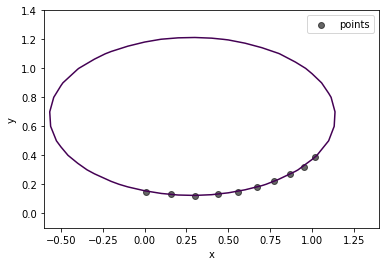

In [85]:
u = np.arange(-0.6, 1.5, 0.1)
v = np.arange(-0.1, 1.5, 0.1)
u, v = np.meshgrid(u,v)
plt.contour(u, v, a*u**2 + b*u*v + c*v**2 + d*u + e*v + 1, [0])
points = plt.scatter(x, y, alpha=0.6, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.legend([points],['points'])
plt.show()

#### Question b

In [86]:
x_0 = np.ones((10,))
y_0 = np.ones((10,))

In [87]:
for i in range(10):
    x_0[i] = x[i] + random.uniform(-0.0005,0.0005)
    y_0[i] = y[i] + random.uniform(-0.0005,0.0005)

In [88]:
x_matrix_new = np.ones((10,5))
for i in range(10):
    x_matrix_new[i][0] = y_0[i]
    x_matrix_new[i][1] = x_0[i]
    x_matrix_new[i][2] = y_0[i] ** 2
    x_matrix_new[i][3] = x_0[i] * y_0[i]
    x_matrix_new[i][4] = x_0[i] ** 2

In [89]:
q_new,r_new = np.linalg.qr(x_matrix)
p_new = np.dot(q_new.T,y_matrix)
a_matrix_new = np.dot(np.linalg.inv(r_new),p_new)

In [90]:
a_new = a_matrix_new[4][0]
b_new = a_matrix_new[3][0]
c_new = a_matrix_new[2][0]
d_new = a_matrix_new[1][0]
e_new = a_matrix_new[0][0]
print(f'a_new = {a_new}')
print(f'b_new = {b_new}')
print(f'c_new = {c_new}')
print(f'd_new = {d_new}')
print(f'e_new = {e_new}')

a_new = 2.253794817514271
b_new = 0.006324713269872717
c_new = 5.522183433130344
d_new = -1.2898102053312357
e_new = -7.377354403400294


with $f = 1$

<font size = 3 color = black face = "Times New Roman">Comparing the two sets of data, we can see that there is hardly any difference between them. That is to say, the addition of perturbation has little effect on the system. 

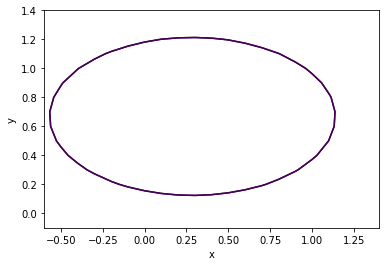

In [91]:
u = np.arange(-0.6, 1.5, 0.1)
v = np.arange(-0.1, 1.5, 0.1)
u_new = np.arange(-0.6, 1.5, 0.1)
v_new = np.arange(-0.1, 1.5, 0.1)
u, v = np.meshgrid(u,v)
u_new, v_new = np.meshgrid(u_new,v_new)
f1 = plt.contour(u, v, a*u**2 + b*u*v + c*v**2 + d*u + e*v + 1, [0])
f2 = plt.contour(u, v, a_new*u_new**2 + b_new*u_new*v_new + c_new*v_new**2 + d_new*u_new + e_new*v_new + 1, [0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<font size = 3 color = black face = "Times New Roman">From this picture, it is not difficult to see that the two fitted images almost completely coincide with each other.So we can say that the addition of perturbations has little effect on our results.